# あやめデータのクラスタリング

- データの内容
	- 3種類のあやめに対して、それぞれ50個の測定データ

- 測定データの内訳
	- ガクの長さ、ガクの幅、花弁の長さ、花弁の幅、花の種類

- `iris['data']`には花の種類以外が入っている。
	- 4種類の測定データを使ってクラスタリング

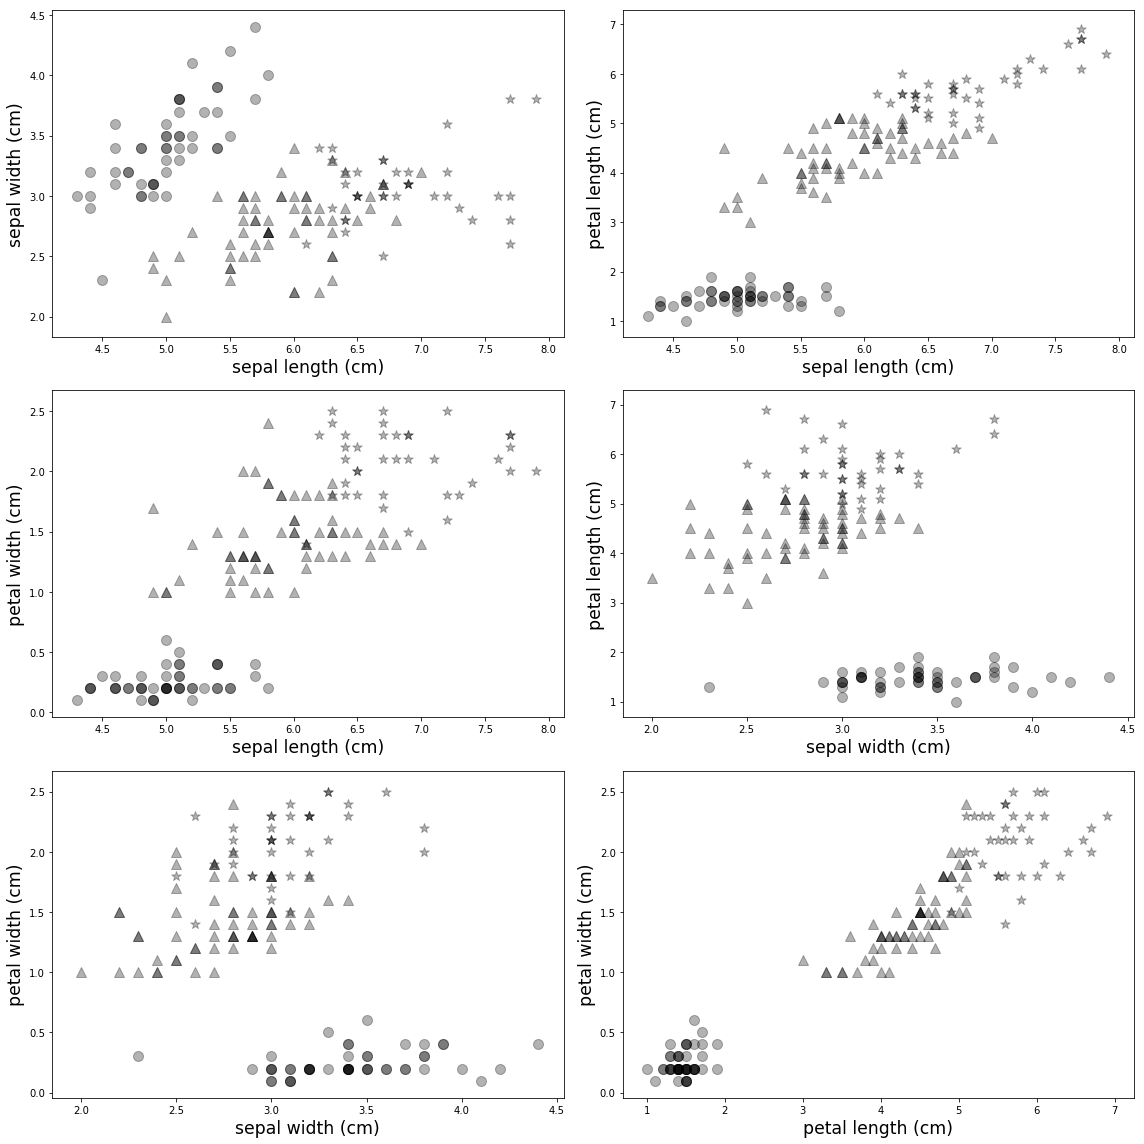

In [1]:
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn import datasets

# iris データをロード
iris = datasets.load_iris()
data = iris['data']

# 学習 → クラスタの生成
model = cluster.KMeans(n_clusters=3)
model.fit(data)

# 学習結果のラベル取得
labels = model.labels_

# グラフの描画
MARKERS = ["o", "^", "*", "v", "+", "x", "d", "p", "s", "1", "2"]


# 指定されたインデックスの feature 値で散布図を作成する関数
def scatter_by_features(feat_idx1, feat_idx2):
    for lbl in range(labels.max() + 1):
        clustered = data[labels == lbl]
        plt.scatter(clustered[:, feat_idx1], clustered[:, feat_idx2],
                    c='black', alpha=0.3, s=100,
                    marker=MARKERS[lbl], label='label {}'.format(lbl))

    plt.xlabel(iris["feature_names"][feat_idx1], fontsize='xx-large')
    plt.ylabel(iris["feature_names"][feat_idx2], fontsize='xx-large')


plt.figure(figsize=(16, 16))

# feature "sepal length" と "sepal width"
plt.subplot(3, 2, 1)
scatter_by_features(0, 1)

# feature "sepal length" と "petal length"
plt.subplot(3, 2, 2)
scatter_by_features(0, 2)

# feature "sepal length" と "petal width"
plt.subplot(3, 2, 3)
scatter_by_features(0, 3)

# feature "sepal width" と "petal length"
plt.subplot(3, 2, 4)
scatter_by_features(1, 2)

# feature "sepal width" と "petal width"
plt.subplot(3, 2, 5)
scatter_by_features(1, 3)

# feature "petal length" と "petal width"
plt.subplot(3, 2, 6)
scatter_by_features(2, 3)

plt.tight_layout()
plt.show()



↑ちょいちょい混ざってる感ある

In [2]:
from sklearn import metrics
print(metrics.confusion_matrix(iris['target'], model.labels_))
print(iris['target_names'])

[[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]
['setosa' 'versicolor' 'virginica']


↑setonaはOKだがversicolorとvirginicaが混じってるっぽい